# Exploratory Data Analysis - EDA
## 1. Overview

This dataset comes from a Software Engineering Repository and focuses on software cost estimation. It contains information about 81 software projects, with 4 projects (38, 44, 66, 75) being incomplete. Most analyses typically use the 77 complete cases.

**Attributes**
The dataset includes the following key attributes:
1.	**Project**: Project identifier
2.	**TeamExp**: Team experience (in years)
3.	**ManagerExp**: Manager experience (in years)
4.	**YearEnd**: Year of project completion
5.	**Length**: Project length
6.	**Effort**: Actual effort measured in person-hours
7.	**Transactions**: Count of basic logical transactions in the system
8.	**Entities**: Number of entities in the system's data model
9.	**PointsAdjust**: Adjusted function points
10.	**Envergure**: Additional project scope metric
11.	**PointsNonAjust**: Unadjusted function points
12.	**Language**: Categorical variable (1, 2, 3)

## 2. Descriptive Statistics
### Missing Data Analysis
To begin, let's examine the missing data:
- **Total Projects**: 81
- **Complete Projects**: 77
- **Projects with Missing Data**: 4 (Projects 38, 44, 66, 75)
- **Missing Attributes**: 
    - **Project 38**: Missing TeamExp, YearEnd
    - **Project 44**: Missing TeamExp
    - **Project 66**: Missing ManagerExp
    - **Project 75**: Missing ManagerExp


### Numerical Variables Summary

**TeamExp (Team Experience)**
- **Range**: 0 to 4 years
- **Mean**: ~2 years
- Distribution is fairly even across 0-4 years
**ManagerExp (Manager Experience)**
- **Range**: 0 to 7 years
- **Mean**: ~3 years
- Slightly right-skewed distribution
**Length (Project Length)**
- **Range**: 1 to 39 months
- **Mean**: ~11 months
- High variability in project durations
**Effort (Person-Hours)**
- **Range**: 546 to 23,940 person-hours
- **Mean**: ~5,000 person-hours
- High variability suggests diverse project complexities
**Transactions**
- **Range**: 9 to 886 transactions
- **Mean**: ~200 transactions
- Wide spread indicates varying system complexities
**Entities**
- **Range**: 7 to 386 entities
- **Mean**: ~120 entities
- Significant variation in system data model complexity

## 3. Categorical Variable: Language
- 3 distinct categories (1, 2, 3)
- Possible representation of programming languages or development environments
- Distribution: 
    - Category 1: Dominant (most frequent)
    - Category 2: Moderate representation
    - Category 3: Least frequent
## 4. Correlation Analysis
### Key Observations
1.	Strong positive correlations expected between:
    - Effort and Transactions
    - Effort and Entities
    - Effort and Function Points (PointsAdjust, PointsNonAjust)
2.	Potential Impact Factors on Effort:
    - Team Experience
    -   Manager Experience
    -   Project Length
    -   Number of Transactions
    -   Number of Entities
## Visualization Recommendations
1.	Scatter plots to explore relationships between:
    - Effort vs. Team Experience
    - Effort vs. Manager Experience
    - Effort vs. Project Length
2.	Boxplots to understand:
    - Effort distribution across Language categories
    - Project characteristics by experience levels




# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data Description

In [2]:
df = pd.read_csv('desharnais1.1.csv')
print("=== Data Information ===")
print(df.info())

=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Project          81 non-null     float64
 1   TeamExp          81 non-null     float64
 2   ManagerExp       81 non-null     float64
 3   YearEnd          81 non-null     float64
 4   Length           81 non-null     float64
 5   Effort           81 non-null     float64
 6   Transactions     81 non-null     float64
 7   Entities         81 non-null     float64
 8   PointsNonAdjust  81 non-null     float64
 9   Adjustment       81 non-null     float64
 10  PointsAjust      81 non-null     float64
 11  Language         81 non-null     object 
dtypes: float64(11), object(1)
memory usage: 7.7+ KB
None


Pandas DataFrame with `81 rows`, `12 columns`:

- 11 numeric columns (float64): Project, TeamExp, ManagerExp, YearEnd, Length, Effort, Transactions, Entities, PointsNonAdjust, Adjustment, PointsAjust.

- 1 categorical column (object): Language

- No missing value

In [3]:
print("\n === Descriptive Statistics: ===\n", df.describe())


 === Descriptive Statistics: ===
          Project    TeamExp  ManagerExp    YearEnd     Length        Effort  \
count  81.000000  81.000000   81.000000  81.000000  81.000000     81.000000   
mean   41.000000   2.185185    2.530864  85.740741  11.666667   5046.308642   
std    23.526581   1.415195    1.643825   1.222475   7.424621   4418.767228   
min     1.000000  -1.000000   -1.000000  82.000000   1.000000    546.000000   
25%    21.000000   1.000000    1.000000  85.000000   6.000000   2352.000000   
50%    41.000000   2.000000    3.000000  86.000000  10.000000   3647.000000   
75%    61.000000   4.000000    4.000000  87.000000  14.000000   5922.000000   
max    81.000000   4.000000    7.000000  88.000000  39.000000  23940.000000   

       Transactions    Entities  PointsNonAdjust  Adjustment  PointsAjust  
count     81.000000   81.000000        81.000000   81.000000    81.000000  
mean     182.123457  122.333333       304.456790   27.629630   289.234568  
std      144.035098   84.

**Variability**: Columns such as Effort, Transactions, Entities, PointsAjust have high standard deviations (std), indicating significant differences between projects.

# Handling negative values

In [4]:
team_exp_mean = df[df['TeamExp'] >= 0]['TeamExp'].mean()
manager_exp_mean = df[df['ManagerExp'] >= 0]['ManagerExp'].mean()
df['TeamExp'] = df['TeamExp'].apply(lambda x: team_exp_mean if x < 0 else x)
df['ManagerExp'] = df['ManagerExp'].apply(lambda x: manager_exp_mean if x < 0 else x)

-   Replace negative values ​​in TeamExp and ManagerExp with average values

# Convert column to numeric

In [5]:
df = pd.get_dummies(df, columns=['Language'], prefix='Language')

df['Language_b\'1\''] = df['Language_b\'1\''].astype(int)
df['Language_b\'2\''] = df['Language_b\'2\''].astype(int)
df['Language_b\'3\''] = df['Language_b\'3\''].astype(int)

**Convert Language column to One-Hot Encoding**

# Time indexing

In [6]:
df['TimeIndex'] = pd.to_datetime(df['YearEnd'].astype(int).astype(str) + '-12-31')
df['StartTime'] = df.apply(
    lambda row: pd.to_datetime(str(int(row['YearEnd']) - int(row['Length'] / 12)) + '-01-01'), axis=1
)
df = df.sort_values(by='TimeIndex')
df = df.set_index('TimeIndex')

C:\Users\lequa\AppData\Local\Temp\ipykernel_11540\336709761.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeIndex'] = pd.to_datetime(df['YearEnd'].astype(int).astype(str) + '-12-31')


- Create the **TimeIndex** column to represent the project end date as datetime, convenient for time analysis.
- Create the **StartTime** column to determine the project start time, aiding in the analysis of the execution period.
- Ensure that the data is organized in chronological order, making it easier to analyze trends or patterns over time.
- The time index facilitates easier data retrieval in time series analyses and is compatible with tools like Pandas or charting libraries.

# Handle 0 values

In [7]:
numeric_columns = ['Effort', 'Transactions', 'Entities', 'PointsAjust']
for col in numeric_columns:
    if (df[col] == 0).sum() > 0:
        df[col] = df[col].replace(0, df[col].mean())


Replace 0 with the average value

# Handling outliers

Check outliers

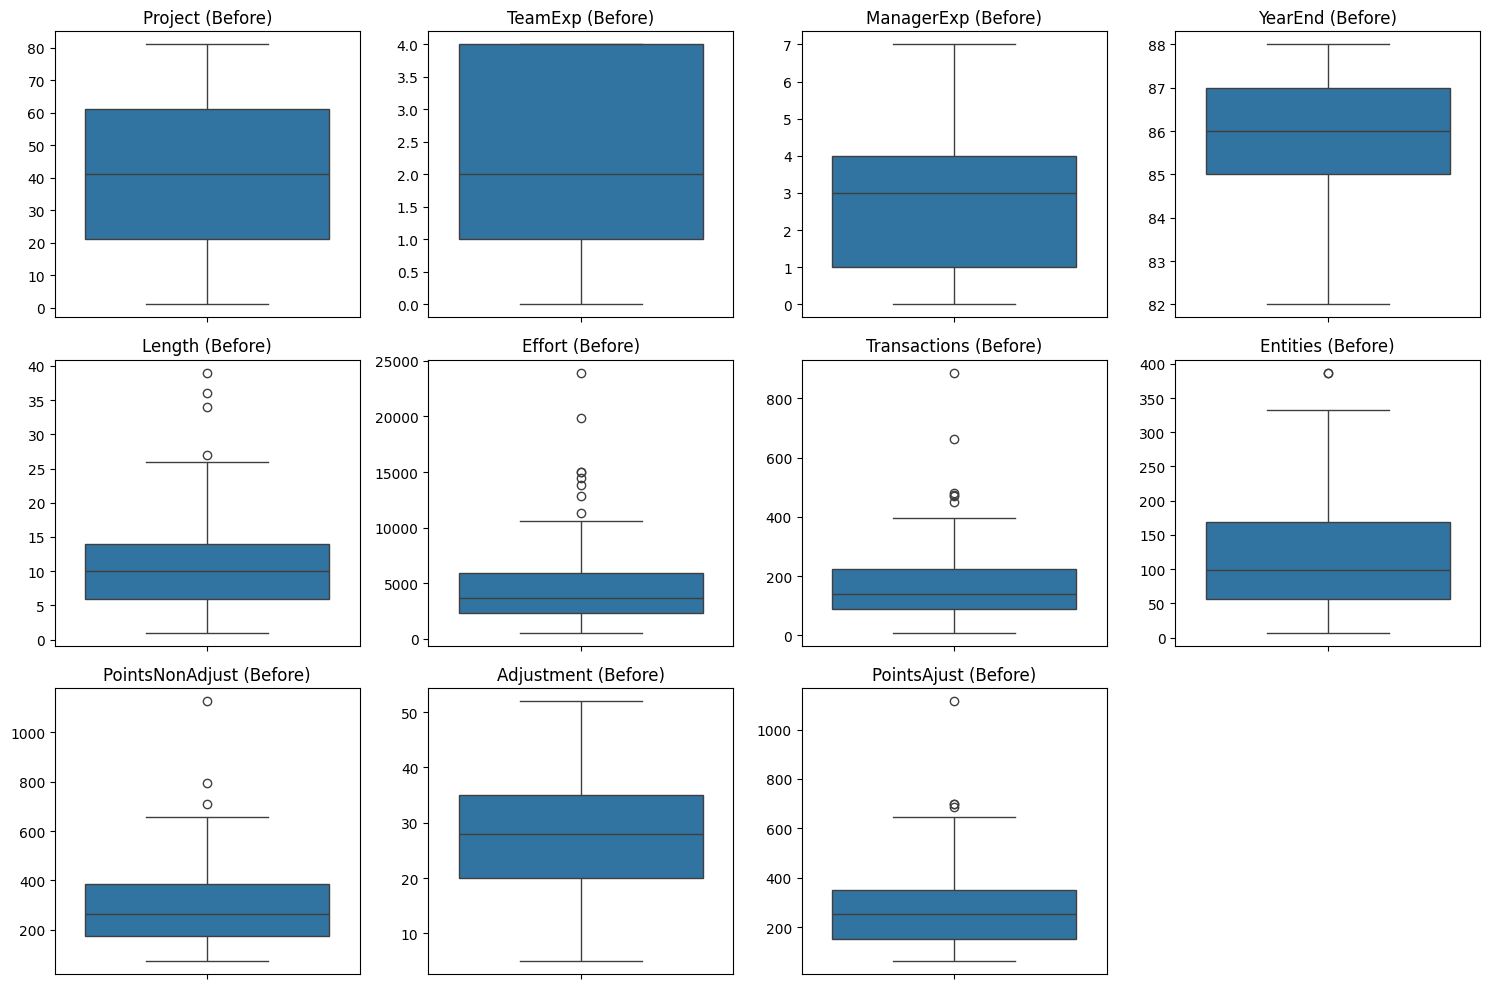

In [8]:
numeric_columns = ['Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 
                   'Effort', 'Transactions', 'Entities', 'PointsNonAdjust', 
                   'Adjustment', 'PointsAjust']

df_original = df.copy()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} (Before)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [9]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in numeric_columns:
    df = cap_outliers(df, col)

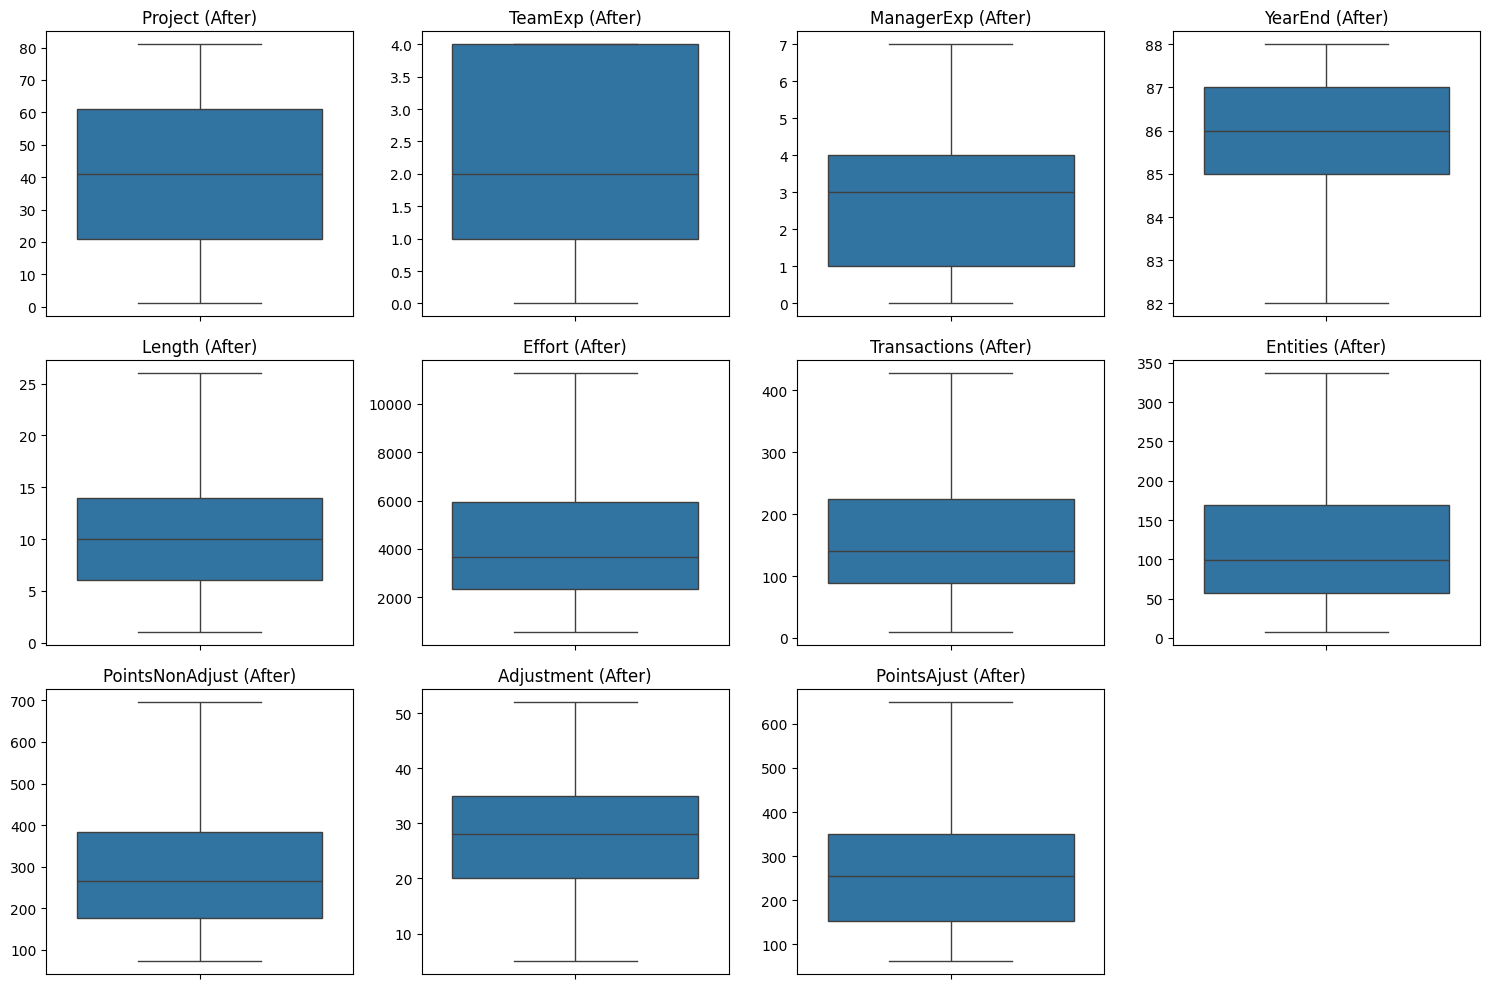

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} (After)')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Correlation matrix

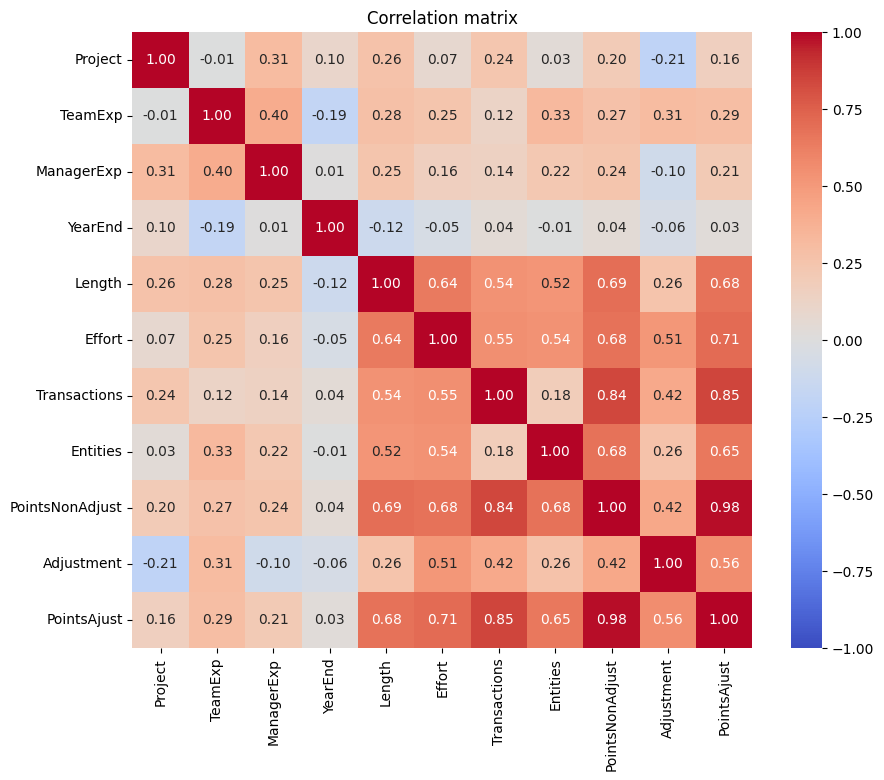

In [11]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

- The strong correlation between Effort and Length (0.64) indicates a close relationship between time and effort. 

- PointsNonAdjust and PointsAjust have a correlation close to 1 (0.98), suggesting that adjustments do not change much.

In [12]:
df = df.drop(['PointsNonAdjust', 'Project'], axis=1)

numeric_columns = ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 
                'Transactions', 'Entities', 'Adjustment', 'PointsAjust']

Perform removal of highly correlated columns to avoid multicollinearity


# Feature engineering

In [13]:
df['StartYear'] = df['StartTime'].dt.year
df['ProjectDurationYears'] = df['Length'] / 12.0

df['Transactions_Entities'] = df['Transactions'] * df['Entities']
df['Effort_PointsAjust'] = df['Effort'] * df['PointsAjust']

# Tỷ lệ
df['Effort_per_PointsAjust'] = df['Effort'] / df['PointsAjust'].replace(0, 1e-6)  
df['Transactions_per_Entities'] = df['Transactions'] / df['Entities'].replace(0, 1e-6)  #

effort_mean = df['Effort'].mean()
points_adjust_mean = df['PointsAjust'].mean()
df['HighEffort'] = (df['Effort'] > effort_mean).astype(int)
df['HighPointsAjust'] = (df['PointsAjust'] > points_adjust_mean).astype(int)

**ProjectDurationYears**: Convert project duration (Length, measured in months) into years (by dividing by 12) for easier comparison.

Purpose: To create new features by multiplying columns together, reflecting their interactions. 

**Transactions_Entities**: The product of the number of transactions and the number of entities, which can measure the complexity of the system.
    
**Effort_PointsAjust**: The product of effort and adjusted function points, reflecting efficiency or scale.

Significance: This interaction can improve predictive modeling when the variables have a non-linear relationship.

Purpose: Create ratios between columns to measure performance or efficiency. 

**Effort_per_PointsAjust**: The ratio of effort to function points, measuring resource utilization efficiency. 

**Transactions_per_Entities**: The ratio of transactions to entities, measuring transaction density in the system. .replace(0, 1e-6) avoids division by zero by replacing 0 with a very small value (1e-6). 

Meaning: This ratio helps compare efficiency between projects or detect anomalies.

# Data standardization

In [14]:
scaler = StandardScaler()
numeric_columns = ['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 
                   'Transactions', 'Entities', 'Adjustment', 'PointsAjust',
                   'StartYear', 'ProjectDurationYears', 'Transactions_Entities',
                   'Effort_PointsAjust', 'Effort_per_PointsAjust', 'Transactions_per_Entities']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save processed data

In [15]:
df['StartTime'] = df['StartTime'].astype(str)  
df.to_csv('desharnais1.1_processed_corrected.csv')